Lets first load few libraries. lphys is where we define our utility functions.

In [1]:
import lphys
import uproot
import matplotlib.pyplot as plt
import mplhep as hep

We will load the data file that we just processed.

In [2]:
# input files
data_file = "/home/student/CMSSW_5_3_32/src/Labo/WeakBosonsAnalyzer/test/LPHY2131tree.root"

Files are in the ROOT format, and can be opened with the uproot package. We then locate the tree with event data in the opened file.

In [4]:
datafile = uproot.open(data_file)
datatree = datafile['LPHY2131analysis/WeakBosonsAnalysis']

The content of the tree can be checked with the command below. As you can see, we find back all the branches introduced during the first session, with the C++ type, and the python equivalent.
uproot will give us access to each branch through objects very similar to Numpy arrays (Akward arrays are basically non-rectangular Numpy arrays (we need that since the number of muons, electrons or jets varies from event to event.

In [5]:
datatree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
nMuons               | int32_t                  | AsDtype('>i4')
MuonsPt              | float[]                  | AsJagged(AsDtype('>f4'))
MuonsEta             | float[]                  | AsJagged(AsDtype('>f4'))
MuonsPhi             | float[]                  | AsJagged(AsDtype('>f4'))
nElectrons           | int32_t                  | AsDtype('>i4')
ElectronsPt          | float[]                  | AsJagged(AsDtype('>f4'))
ElectronsEta         | float[]                  | AsJagged(AsDtype('>f4'))
ElectronsPhi         | float[]                  | AsJagged(AsDtype('>f4'))
invMass              | float                    | AsDtype('>f4')
transvMass           | float                    | AsDtype('>f4')
dileptonPt           | float                    | AsDtype('>f4')
dileptonEta          | float                    | AsDtype('>f4'

Draw selected items.

You can tune many things in the command below:
- branch is the variable to show
- simpleselection is a filter on events
- index allows to plot a specific object when you cope with vectors. If not needed, set to None.
- density: if True, the histogram is normalized to 1. This gives a probability distribution. Otherwise, the event count is shown.
- facecolor and alpha affect the style of the plot
You can use all the options of https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

In the example below, we look at the Pt of the highest-Pt muon (MuonsPt, index=0) for events containing at least one muon (events.nMuons>0).

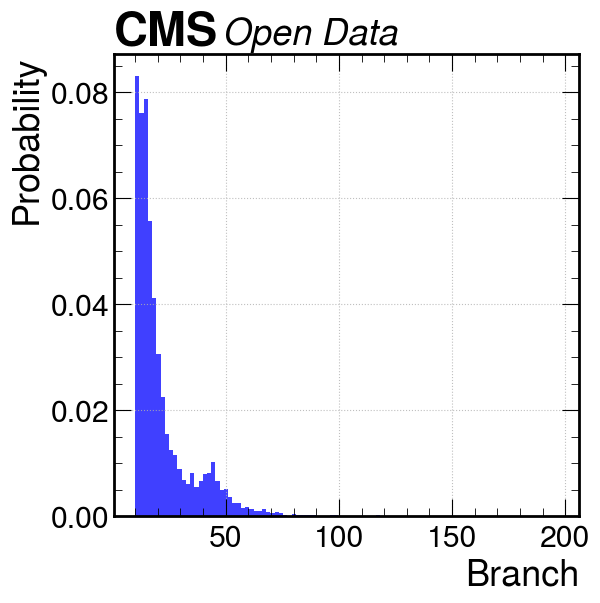

In [11]:
selected_data = lphys.analyzeTree(datatree,branch="MuonsPt",simpleselection=lambda events:events.nMuons>0,index=0)

plt.figure(figsize=(6,6))
hep.style.use(hep.style.CMS)
hep.cms.text("Open Data")
# the histogram of the data
n, bins, patches = plt.hist(selected_data, 100, density=True, facecolor='b', alpha=0.75)
plt.xlabel('Branch')
plt.ylabel('Probability')
#plt.xlim(40, 140)
#plt.ylim(0, 0.3)
plt.grid(True)